In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import json

In [18]:
data_path = r'C:\Users\tjjaf\Desktop\ML Projects\COVID-19 Classification - Keras CNN\chest_xray'
os.chdir(data_path)

train_path = os.path.join (data_path, 'train')
test_path = os.path.join (data_path, 'test')

train_covd_path = os.path.join (train_path, 'PNEUMONIA')
train_norm_path = os.path.join (train_path, 'NORMAL')

test_covd_path = os.path.join (test_path, 'PNEUMONIA')
test_norm_path = os.path.join (test_path, 'NORMAL')

In [19]:
train_covd_pics = os.listdir(train_covd_path)
train_norm_pics = os.listdir(train_norm_path)
test_covd_pics = os.listdir(test_covd_path)
test_norm_pics = os.listdir(test_norm_path)

print ('total testing pics = ', len(test_norm_pics + test_covd_pics))

print ('total training pics = ', len(train_norm_pics + train_covd_pics))

total testing pics =  624
total training pics =  5232


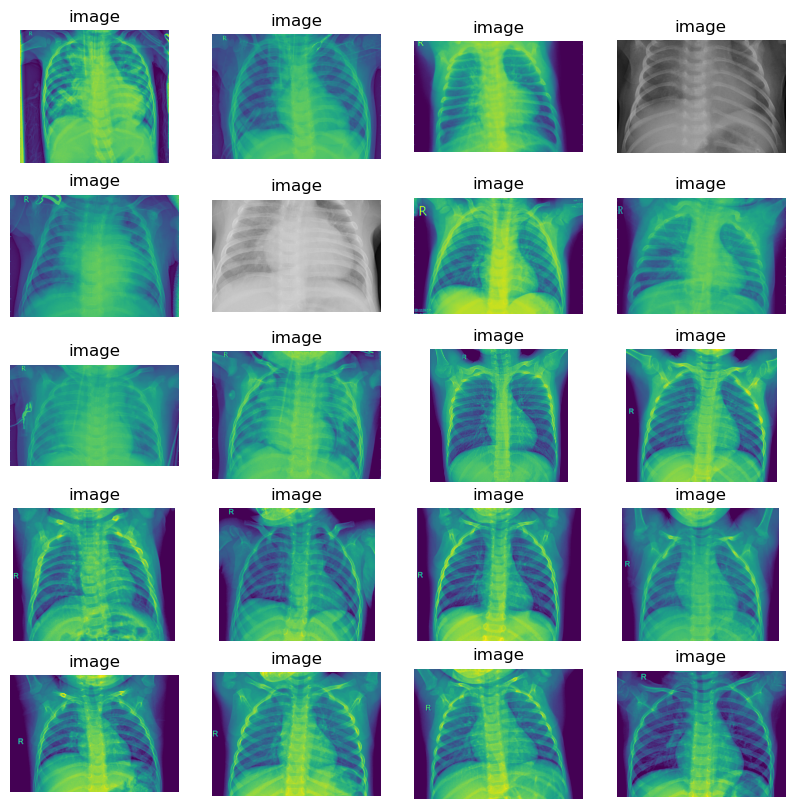

In [42]:
rows = 5
columns = 4
fig = plt.gcf()
fig.set_size_inches(10,10)

covd_pics = [os.path.join(train_covd_path, filename) for filename in train_covd_pics[0:10]]
norm_pics = [os.path.join(train_norm_path, filename) for filename in train_norm_pics[0:10]]

merged_pics = covd_pics + norm_pics

for i, img_path in enumerate(merged_pics):
    sp = plt.subplot(rows, columns, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title('image', fontsize = 12)
    plt.imshow(img)
plt.show()

In [49]:
pre_train = ImageDataGenerator(rescale = 1/250,
                              validation_split = 0.1,
                              horizontal_flip = True)
pre_valid = ImageDataGenerator(rescale = 1/250)
pre_test = ImageDataGenerator(rescale = 1/250)

train_gen = pre_train.flow_from_directory(train_path,
                                          target_size = (100,100),
                                         subset = 'training',
                                         batch_size = 50,
                                         class_mode = 'binary')

test_gen = pre_test.flow_from_directory(test_path,
                                          target_size = (100,100),
                                         batch_size = 50,
                                         class_mode = 'binary')
valid_gen = pre_train.flow_from_directory(train_path,
                                          target_size = (100,100),
                                         subset = 'validation',
                                         batch_size = 50,
                                         class_mode = 'binary')

Found 4710 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 522 images belonging to 2 classes.


In [53]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [62]:
cnn.compile(Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [70]:
training = cnn.fit(train_gen,
                  epochs = 20,
                  validation_data = valid_gen)

Epoch 1/20
95/95 [==============================] - 67s 707ms/step - loss: 0.1664 - accuracy: 0.9403 - val_loss: 0.1778 - val_accuracy: 0.9195
Epoch 2/20
95/95 [==============================] - 73s 769ms/step - loss: 0.1352 - accuracy: 0.9510 - val_loss: 0.1297 - val_accuracy: 0.9483
Epoch 3/20
95/95 [==============================] - 74s 773ms/step - loss: 0.1243 - accuracy: 0.9531 - val_loss: 0.1217 - val_accuracy: 0.9521
Epoch 4/20
95/95 [==============================] - 74s 780ms/step - loss: 0.1291 - accuracy: 0.9529 - val_loss: 0.1058 - val_accuracy: 0.9579
Epoch 5/20
95/95 [==============================] - 73s 772ms/step - loss: 0.1195 - accuracy: 0.9529 - val_loss: 0.1189 - val_accuracy: 0.9502
Epoch 6/20
95/95 [==============================] - 73s 766ms/step - loss: 0.1209 - accuracy: 0.9563 - val_loss: 0.1120 - val_accuracy: 0.9540
Epoch 7/20
95/95 [==============================] - 73s 774ms/step - loss: 0.1131 - accuracy: 0.9577 - val_loss: 0.1131 - val_accuracy: 0.9559

In [65]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

C:\Users\tjjaf\AppData\Local\Temp\ipykernel_15924\557984243.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training', 'Validation')


Text(0.5, 0, 'epochs')

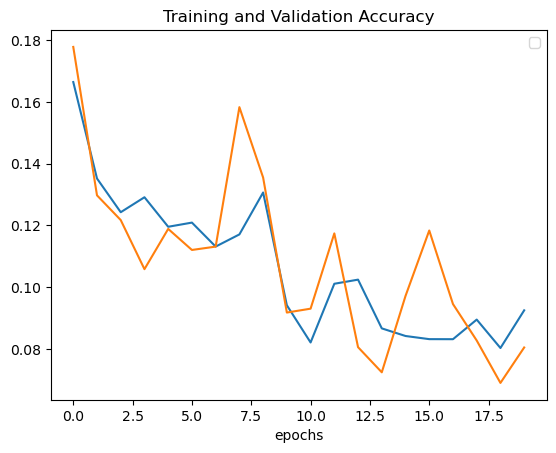

In [71]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend('Training', 'Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')


C:\Users\tjjaf\AppData\Local\Temp\ipykernel_15924\896602100.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Accuracy', 'Validation Accuracy')


Text(0.5, 0, 'epochs')

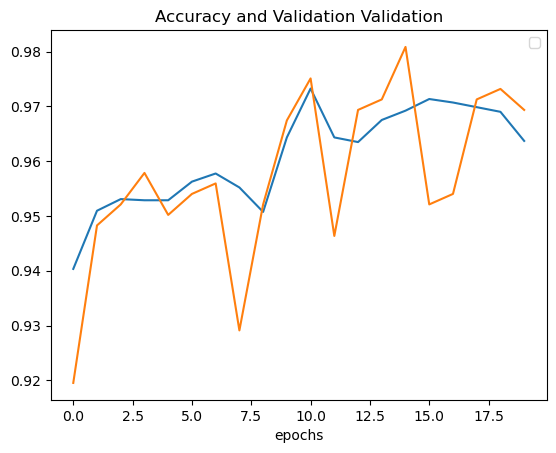

In [72]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend('Accuracy', 'Validation Accuracy')
plt.title('Accuracy and Validation Validation')
plt.xlabel('epochs')


In [74]:
test_loss, test_acc = cnn.evaluate(test_gen)

print('Test Loss :{} Test Accuracy :{}' .format(test_loss, test_acc))


13/13 [==============================] - 5s 390ms/step - loss: 0.4847 - accuracy: 0.7901
Test Loss :0.48467254638671875 Test Accuracy :0.7900640964508057
